In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os
ROOT = "/content/drive/MyDrive/Ineuron_DeepLearning"
os.chdir(ROOT)

#### Official docs link for [DETAILED INSTALLATION STEPS](https://www.tensorflow.org/install) for Tensorflow 2

In [60]:
os.getcwd()

'/content/drive/MyDrive/Ineuron_DeepLearning'

In [61]:
# Verify installation - 
import tensorflow as tf

In [62]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.6.0
Keras Version: 2.6.0


### GPU/CPU Check

In [63]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [64]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [65]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU is available
details
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## A simple classifier using Keras's Sequential API

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [67]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [68]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [69]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



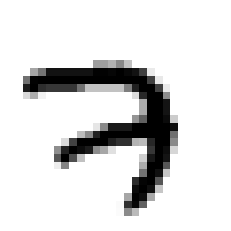

In [70]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


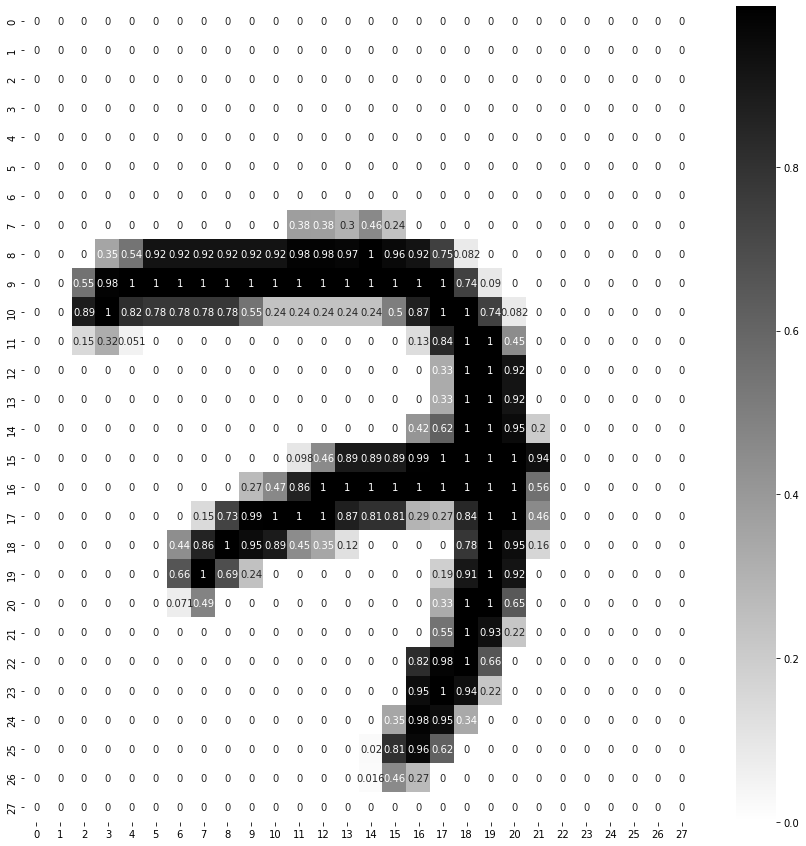

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

## Writing sample images to the TensorBoard

### Creating a TensorBoard log directory with unique name

In [72]:
import time

def get_log_path(log_dir="logs/fit"):
  uniqueName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir, uniqueName)
  print(f"savings logs at: {log_path}")

  return log_path

log_dir = get_log_path()

savings logs at: logs/fit/log_2021_10_13_01_21_59


In [73]:
#Create the file write
file_writer = tf.summary.create_file_writer(logdir=log_dir)

In [74]:
# Call the file_writer using with command like file open
with file_writer.as_default():
  # Here we passing the image b/w 10 to 30 & the reshape size we can dynamically adjust based on 
  # given input may be 10,20 image ,so we will give -1 means take as per input assign, last one is define for dimention(Grey scale)
  images = np.reshape(X_train[10:30], (-1, 28, 28, 1)) ### <<< 20, 28, 28, 1
  tf.summary.image("20 handritten digit samples", images, max_outputs=25, step=0)

In [75]:
images.shape

(20, 28, 28, 1)

In [76]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [77]:
# like agr parser
# all tensorflow events are stored inside the log dir
# Click image Tab and check  & experiment with show actual size
%tensorboard --logdir logs/fit

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 979.

In [78]:
# actual value of y_train
y_train[0]

7

In [79]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [80]:
model_clf.layers

In [81]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [82]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [83]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [84]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [85]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [86]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [87]:
type(hidden1.get_weights())

list

In [88]:
hidden1.get_weights()

[array([[-0.07121348,  0.02996858, -0.00892057, ...,  0.00271201,
         -0.01745396, -0.03795929],
        [-0.04835112, -0.02941121, -0.05557812, ...,  0.03858346,
          0.043233  ,  0.06377788],
        [ 0.06149432, -0.01855569,  0.02798058, ..., -0.0519271 ,
          0.06740148,  0.05877876],
        ...,
        [-0.04767786, -0.04823187, -0.02091664, ..., -0.03426936,
          0.0719496 ,  0.04398869],
        [-0.00387175, -0.01315638,  0.05500597, ...,  0.03606904,
         -0.06403239, -0.05671719],
        [ 0.02937387,  0.01002428, -0.02701699, ..., -0.05641264,
         -0.01596201,  0.03700565]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [89]:
weights, biases = hidden1.get_weights()

In [90]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[-0.07121348,  0.02996858, -0.00892057, ...,  0.00271201,
        -0.01745396, -0.03795929],
       [-0.04835112, -0.02941121, -0.05557812, ...,  0.03858346,
         0.043233  ,  0.06377788],
       [ 0.06149432, -0.01855569,  0.02798058, ..., -0.0519271 ,
         0.06740148,  0.05877876],
       ...,
       [-0.04767786, -0.04823187, -0.02091664, ..., -0.03426936,
         0.0719496 ,  0.04398869],
       [-0.00387175, -0.01315638,  0.05500597, ...,  0.03606904,
        -0.06403239, -0.05671719],
       [ 0.02937387,  0.01002428, -0.02701699, ..., -0.05641264,
        -0.01596201,  0.03700565]], dtype=float32)

In [91]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

$$loss\_function(actual, pred) = error$$

In [92]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [93]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

* **batch_size**: Integer or None. 
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

## TENSORBOARD_CALLBACK

In [94]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

## EARLY_STOPPING CALLBACK

In [95]:
#if past 5 epoc accuracy is not improved stop,Restore best weight before stopping 
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## Model Checkpointing callback

In [96]:
# Save the model,if model crashed in b/w execution, restore epoc which has the best one & resume while call checkpoint
CKPT_path = "model_ckpt.h5"

checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [97]:
CALLBACKS_LIST = [tensorboard_cb, early_stopping_cb, checkpointing_cb]

In [98]:
# Here call callbacks list
EPOCHS = 100 ###<< Experiment with higher nos.
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, callbacks=CALLBACKS_LIST)


Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6067 - accuracy: 0.8447 - val_loss: 0.3055 - val_accuracy: 0.9182
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2870 - accuracy: 0.9188 - val_loss: 0.2378 - val_accuracy: 0.9354
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2332 - accuracy: 0.9330 - val_loss: 0.1976 - val_accuracy: 0.9468
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1996 - accuracy: 0.9431 - val_loss: 0.1773 - val_accuracy: 0.9504
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1741 - accuracy: 0.9506 - val_loss: 0.1556 - val_accuracy: 0.9564
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1548 - accuracy: 0.9562 - val_loss: 0.1505 - val_accuracy: 0.9574
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1389 - accuracy: 0.9608 - val_loss: 0.1313 - val_ac

In [99]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [100]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_10_13_01_27_00_.h5


In [101]:
history.params


{'epochs': 100, 'steps': 1719, 'verbose': 1}

In [102]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.606679,0.844691,0.305473,0.9182
1,0.287019,0.918818,0.237784,0.9354
2,0.233249,0.933018,0.197628,0.9468
3,0.199645,0.943055,0.177286,0.9504
4,0.174111,0.950600,0.155585,0.9564
5,0.154792,0.956182,0.150488,0.9574
6,0.138867,0.960800,0.131349,0.9638
7,0.125003,0.964727,0.122190,0.9672
8,0.114056,0.967382,0.115430,0.9676
9,0.104558,0.970327,0.109495,0.9688


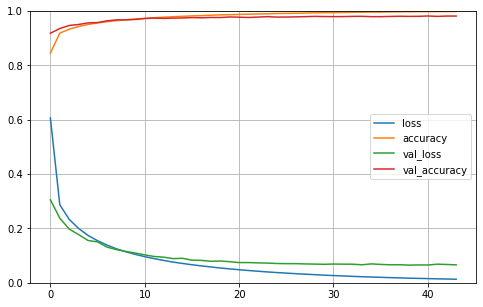

In [103]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [104]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9788


[0.0685417577624321, 0.9787999987602234]

In [105]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [106]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

In [107]:
y_test_new = y_test[:3]

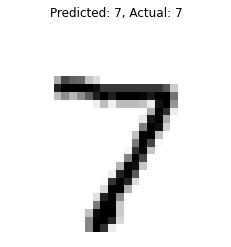

------------------------------------------------------------


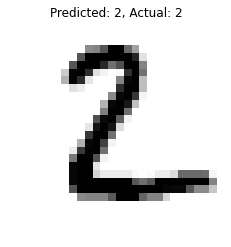

------------------------------------------------------------


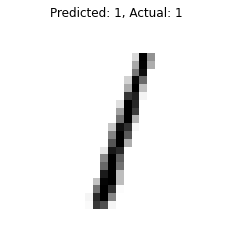

------------------------------------------------------------


In [108]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

## restart the training from checkpoint 

In [109]:
#Here we can see the accuracy started from last stopped training accuracy(Means use last best weight)
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, callbacks=CALLBACKS_LIST)

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0163 - accuracy: 0.9975 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0154 - accuracy: 0.9977 - val_loss: 0.0669 - val_accuracy: 0.9808
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0146 - accuracy: 0.9981 - val_loss: 0.0651 - val_accuracy: 0.9810
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.9981 - val_loss: 0.0658 - val_accuracy: 0.9810
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0660 - val_accuracy: 0.9814
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0125 - accuracy: 0.9984 - val_loss: 0.0665 - val_accuracy: 0.9810
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0119 - accuracy: 0.9986 - val_loss: 0.0654 - val_ac